In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
tips=sns.load_dataset('tips')
tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
127,14.52,2.00,Female,No,Thur,Lunch,2
69,15.01,2.09,Male,Yes,Sat,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3
134,18.26,3.25,Female,No,Thur,Lunch,2
22,15.77,2.23,Female,No,Sat,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2
204,20.53,4.00,Male,Yes,Thur,Lunch,4
149,7.51,2.00,Male,No,Thur,Lunch,2
58,11.24,1.76,Male,Yes,Sat,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1


##  Statistical Relationship 
sns.replot函数用于绘制变量之间的关系图，如散点图或线性图。

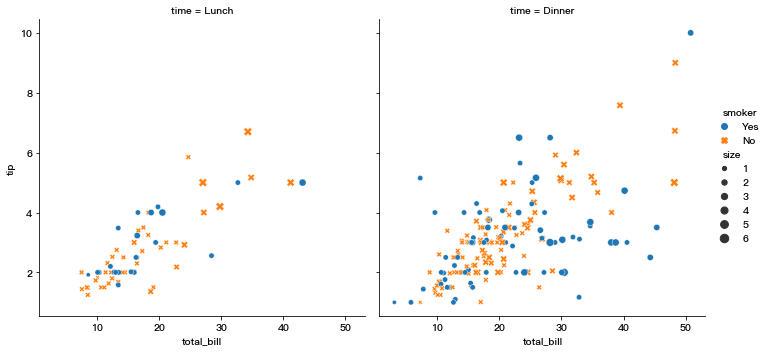

In [33]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='smoker',#hue参数将某个变量着色，起到group by=该变量的效果。
    col='time',#根据col的不同，在同一幅画布中绘制多个列（axes），本质也是group by
    style='smoker',#style参数将除x与y之外的某个变量，根据其取值绘制不同的形状，如分别绘制○和×，本质是group by
    size='size',#数据点的大小,
    kind='scatter'
)

上图中的hue参数接收的为离散变量，其着色为非渐变的。如果hue参数接收的为连续变量，那么着色是渐变的。

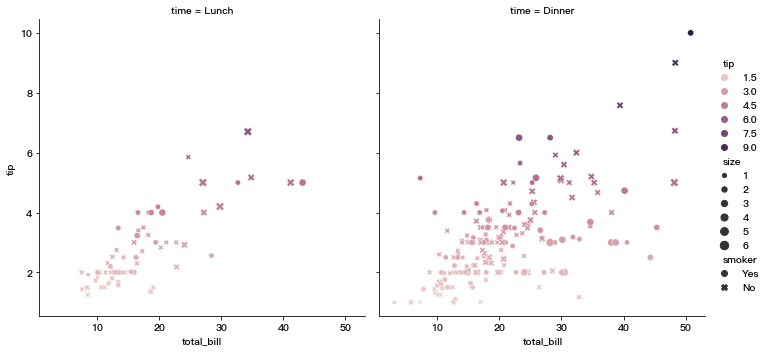

In [103]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='tip',#hue参数将某个变量着色，起到group by=该变量的效果。
    col='time',#根据col的不同，在同一幅画布中绘制多个列（axes），本质也是group by
    style='smoker',#style参数将除x与y之外的某个变量，根据其取值绘制不同的形状，如分别绘制○和×，本质是group by
    size='size',#数据点的大小,
    kind='scatter'
)

通过relplot函数中，对参数的赋值方式，我们可以看出：
1. 在plt中，我们需要指定数据点的颜色、大小、形状等参数；
2. 但在sns中，我们需要指定的是根据何种变量，来区分颜色、大小、形状等参数。可见sns让用户更加注重于问题的探究，而非如何精细地控制画布的细节。

## Statistical Estimation

In [20]:
#功能性磁共振成像（FMRI，functional magnetic resonance imaging）
fmri=sns.load_dataset('fmri')
fmri.sample(10)

,subject,timepoint,event,region,signal
120,s6,10,stim,parietal,-0.075433
1024,s5,9,cue,frontal,-0.028837
275,s9,0,stim,frontal,0.002888
403,s12,9,stim,frontal,-0.047257
564,s12,2,cue,parietal,-0.009485
352,s3,6,stim,frontal,0.282222
966,s1,7,cue,frontal,-0.053825
849,s5,15,cue,parietal,0.007885
234,s9,4,stim,parietal,0.307250
938,s13,11,cue,frontal,-0.040369


使用relplot函数，可以快捷地展示被解释变量的：
1. 估计值；
2. 使用bootstrapping计算出的置信区间；
3. error bar，用来衡量估计的不确定性。

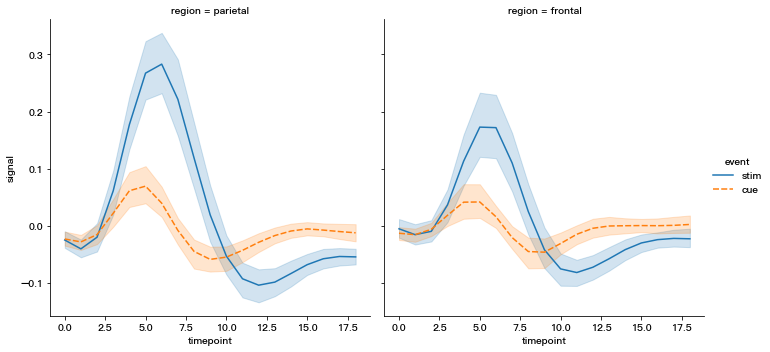

In [27]:
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    kind='line',#OLS时应指定kind参数为"line"，即线性估计
    col='region',
    hue='event',
    style='event'
)

此外，我们也可以使用lmplot函数来丰富一般散点图所提供的信息，即散点图+线性图+置信区间。

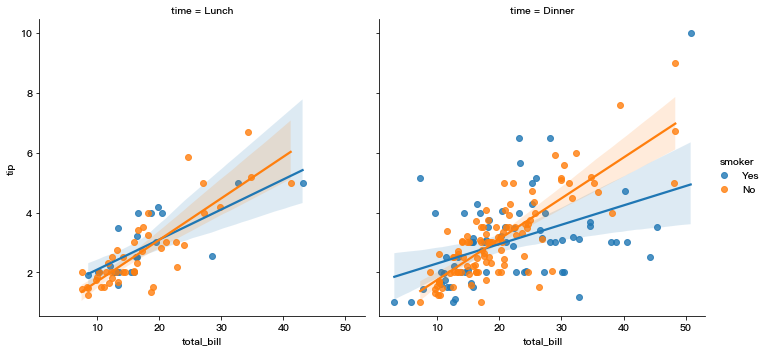

In [34]:
#linear model plot
sns.lmplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='time',
    hue='smoker'
)

## Distributional Representations
使用displot函数来展示数据的分布特征。既可通过直方图，也可通过核密度图来展示。

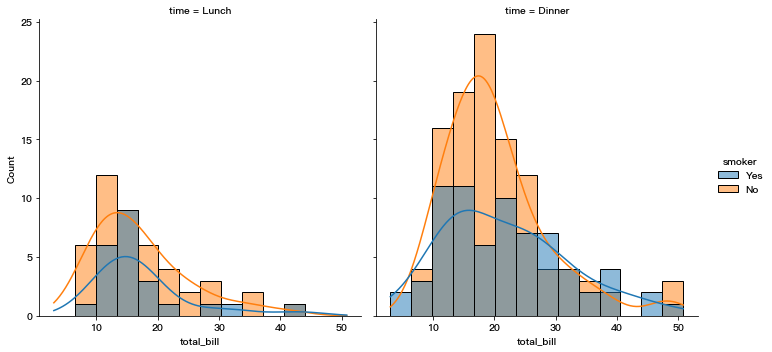

In [41]:
sns.displot(data=tips,x='total_bill',col='time',hue='smoker',kde=True)

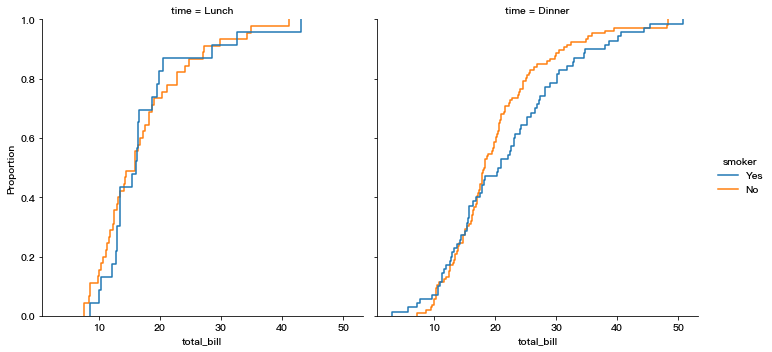

In [48]:
#kind=ecdf，即empirical cumulative distribution function
sns.displot(data=tips,x='total_bill',col='time',hue='smoker',kind='ecdf')#ecdf与kde不能共存

## Plot for Categorical Data
使用catplot函数，可以直接调用seaborn预先制作好的可视化方案，如根据granularity可分为swarm、violin以及bar。也可以使用axes-level的函数，即swarmplot,violinplot,barplot将三幅图绘制在同一个figure中。

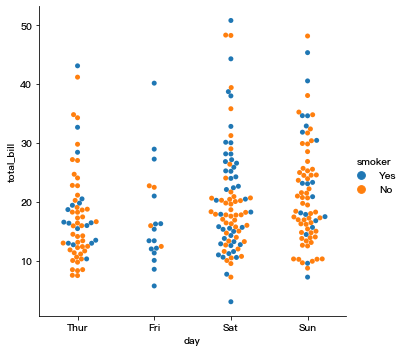

In [65]:
sns.catplot(data=tips,kind='swarm',x='day',y='total_bill',hue='smoker')

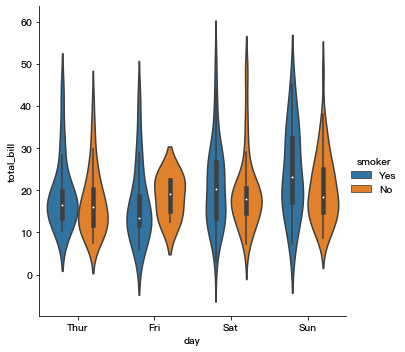

In [63]:
sns.catplot(data=tips,kind='violin',x='day',y='total_bill',hue='smoker')

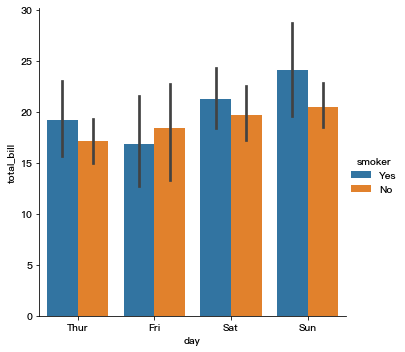

In [64]:
sns.catplot(data=tips,kind='bar',x='day',y='total_bill',hue='smoker')

## Multivariate Views
jointplot用于绘制两个变量之间的单一关系，而pariplot用于绘制多个变量之间的多个关系。

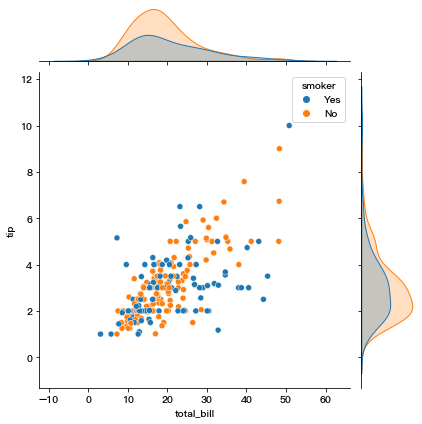

In [75]:
sns.jointplot(data=tips,x='total_bill',y='tip',hue='smoker')
#上方和右方分别为两个变量的边缘分布，中间则为联合分布

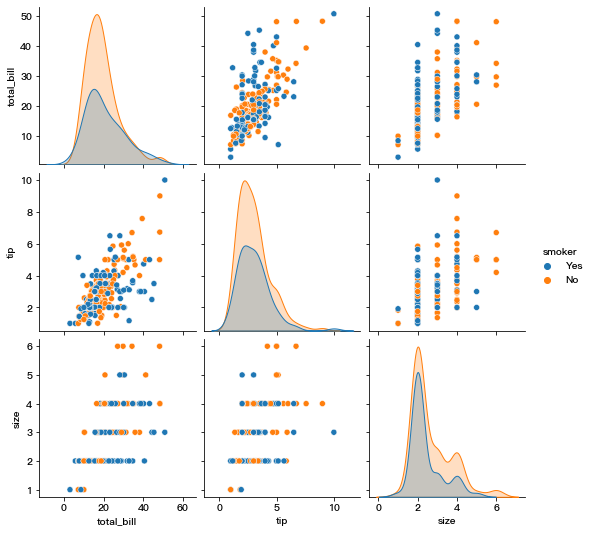

In [78]:
sns.pairplot(data=tips,hue='smoker')
#对角线为边缘分布，其余为联合分布

## Low-Level Tools for Building Figures
上述所介绍的所有绘图函数，即relplot,lmplot,catplot,jointplot,以及pairplot均是figure-level的，而非axes-level。即无法使用plt.subplot(s)绘制子图。现在将展示axes-level的函数。

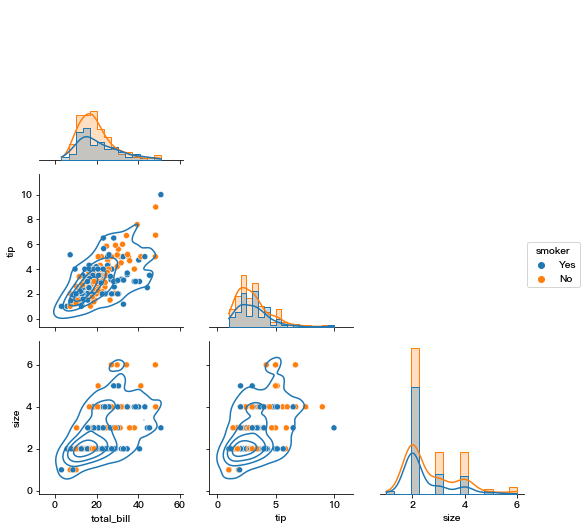

In [102]:
g=sns.PairGrid(data=tips,hue='smoker',corner=True)

#kdeplot,scatterplot,histplot均为axes-level
g.map_lower(sns.kdeplot,hue=None,levels=5)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot,element='step',kde=True)#element是histplot的参数，用于控制直方图的显示种类

g.add_legend(frameon=True)